In [2]:
# OpenOE_AC_map_v1_01, 06/30/15
#__version__=1.02
#__version__=1.03 # removing the initial gap (acquired when Open Ephys is initialized)
__version__=1.04 # 07/03/15, adding saving the averaged file into an hdf5-file
__version__=1.05 # fixing the averaging, AAC
__version__=1.06 # fixed variable initial TTL-triggered datapoints removal, zeroing time
__version__ # CSD added CSD analysis
__version__=1.07 # file output is now into the report directory
__version__=1.08 # batch analysis, one figure summary output
__version__=1.0801 #troubleshooting misalignment during averaging, single channel from d2_array seems fine.
__version__=1.0802 # creating summaries for all three columns of the 64ch shank
__version__=1.09 # 07/27/15 Sorting order of file_list is fixed, CSD working properly. everything is working
__version__=1.0901 # 07/29/15 true CSD
__version__=1.12 # 03/15/16 - added spectrogram, frequency analysis
__version__=1.13 # 04/08/16 - use seaborn for formatting for publication (larger fonts, despined)
__version__=1.14 # 07/29/16 - trying to remove trials with mouse movement from the final averaged LFP using 1500 uV threshold



initial_gap=7168 # this is now recalculated later in the code, as this is variable from trial-to-trial

probe='64DA'

if probe=='64DA':
    
     # 64D probe mapping, channels face me
        probe_map={47:0.00, 63:1.00, 17:2.00,
               46:0.01, 0:1.01, 18:2.01,
               45:0.02, 62:1.02, 19:2.02,
               44:0.03, 1:1.03, 20:2.03,
               43:0.04, 61:1.04, 21:2.04,
               42:0.05, 2:1.05, 22:2.05,
               41:0.06, 60:1.06, 23:2.06,
               40:0.07, 3:1.07, 24:2.07,
               39:0.08, 59:1.08, 25:2.08,
               38:0.09, 4:1.09, 26:2.09,
               37:0.10, 58:1.10, 27:2.10,
               36:0.11, 5:1.11, 28:2.11,
               35:0.12, 57:1.12, 29:2.12,
               34:0.13, 6:1.13, 30:2.13,
               33:0.14, 56:1.14, 31:2.14,
               32:0.15, 7:1.15, 16:2.15,
               48:0.16, 55:1.16, 15:2.16,
               49:0.17, 8:1.17, 14:2.17,
               50:0.18, 54:1.18, 13:2.18,
               51:0.19, 9:1.19, 12:2.19,
               52:0.20, 53:1.20, 11:2.20,
                        10:1.21
               }     


elif probe == '64DB':
    # 64D probe mapping, channels face monitor
        probe_map={16:0.00, 0:1.00, 46:2.00,
               17:0.01, 63:1.01, 45:2.01,
               18:0.02, 1:1.02, 44:2.02,
               19:0.03, 62:1.03, 43:2.03,
               20:0.04, 2:1.04, 42:2.04,
               21:0.05, 61:1.05, 41:2.05,
               22:0.06, 3:1.06, 40:2.06,
               23:0.07, 60:1.07, 39:2.07,
               24:0.08, 4:1.08, 38:2.08,
               25:0.09, 59:1.09, 37:2.09,
               26:0.10, 5:1.10, 36:2.10,
               27:0.11, 58:1.11, 35:2.11,
               28:0.12, 6:1.12, 34:2.12,
               29:0.13, 57:1.13, 33:2.13,
               30:0.14, 7:1.14, 32:2.14,
               31:0.15, 56:1.15, 47:2.15,
               15:0.16, 8:1.16, 48:2.16,
               14:0.17, 55:1.17, 49:2.17,
               13:0.18, 9:1.18, 50:2.18,
               12:0.19, 54:1.19, 51:2.19,
               11:0.20, 10:1.20, 52:2.20,
                        53:1.21
               }
        


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42 
mpl.rcParams['font.sans-serif']=['Arial', 'Helvetica','Bitstream Vera Sans', 'DejaVu Sans', 'Lucida Grande', 
                                 'Verdana', 'Geneva', 'Lucid', 'Avant Garde', 'sans-serif']  


# pal=sns.blend_palette(["black", "crimson"], 2)
sns.despine()
# current_palette = sns.color_palette("colorblind", 10)
# sns.set_palette(current_palette)

# for publication quality plots, not bar graphs, use this: 
def set_pub_plots(pal=sns.blend_palette(["gray","crimson", 'cyan', 'magenta', 'purple' ],5)):
    sns.set_style("white")
    sns.set_palette(pal)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5, "axes.linewidth":2.5}) 
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    # optional, makes markers bigger, too, axes.linewidth doesn't seem to work
    plt.rcParams['axes.linewidth'] = 2.5

rc_pub={'font.size': 25, 'axes.labelsize': 25, 'legend.fontsize': 25.0, 
    'axes.titlesize': 25, 'xtick.labelsize': 25, 'ytick.labelsize': 25, 
    #'axes.color_cycle':pal, # image.cmap - rewritesd the default colormap
    'axes.linewidth':2.5, 'lines.linewidth': 2.5,
    'xtick.color': 'black', 'ytick.color': 'black', 'axes.edgecolor': 'black','axes.labelcolor':'black','text.color':'black'}
# to restore the defaults, call plt.rcdefaults() 

#set_pub_bargraphs()
set_pub_plots()

%load_ext autoreload
%autoreload 2

import scipy.signal as sg
sns.set_context("poster")
sns.set_style("ticks")
from collections import Counter
import Python3_OpenEphys_V14 as OE
import pandas as pd
from pandas import DataFrame
import numpy as np
import glob
import os
import re
import sys
import fnmatch

<Figure size 640x480 with 0 Axes>

In [4]:
# import dask.dataframe as dd

In [5]:
# import seaborn as sns
import Python3_OpenOE_AC_map_functions_v1_08_30s as oem
# %matplotlib inline
import scipy
sns.set_context('poster')

In [6]:
path=r'U:\Data\tang232\V1+LM\aligneddataall\BPnoise'
ls=[os.path.join(path, fd) for fd in os.listdir(path) if '.txt' not in fd]
ls1=[os.path.join(p,fd) for p in ls for fd in os.listdir(p) if '.txt' not in fd and '.npy' not in fd and '.png' not in fd]
files=[os.path.join(p,f) for p in ls1 for f in os.listdir(p)]
match = [f for f in files if '.npy' in f 
                             and 'broke' not in f 
                             and '.txt' not in f
                             #and not any(et in f for et in et_to_exclude)
        ]
match[:5]

['U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_0.npy',
 'U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_1.npy',
 'U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_2.npy',
 'U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_0.npy',
 'U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_1.npy']

In [7]:
note=r'U:\Data\tang232\V1+LM\aligneddataall\BPnoise\et_to_exclude.txt'
text_file = open(note, "r")
# lines = text_file.readlines()
lines = text_file.read().split('\n')
et_to_exclude=[et for et in lines if 'ET#' in et]
text_file.close()
print (et_to_exclude)
match=[f for f in match if not any(et in f for et in et_to_exclude)]
for f in sorted(match):
    print (f.split('\\')[-1])


['ET#010_right_pre', 'ET#012_right_post', 'ET#013_right_post', 'ET#014_right_post', 'ET#015_right_post']
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_0.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_1.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_2.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_0.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_1.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_2.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_0.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_1.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_2.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_004 BPnoise

In [8]:
## stim info, for ET#009 and ET#010
import os
movpath=r'U:\Visual Stimulation\Yu Visual Stim\BPnoise\0.2duration'
mov_names=[m for m in os.listdir(movpath) if 'mp4' in m]
print(sorted(mov_names))
order = [ 2,  7, 17, 18, 21,  6,  3,  1, 22, 14, 13, 12,  8,  0, 16, 23,  5,
15, 24, 20, 10, 19,  9, 11,  4]

['0.015_0.75_pinknoise.mp4', '0.015_1.5_pinknoise.mp4', '0.015_12_pinknoise.mp4', '0.015_3_pinknoise.mp4', '0.015_6_pinknoise.mp4', '0.03_0.75_pinknoise.mp4', '0.03_1.5_pinknoise.mp4', '0.03_12_pinknoise.mp4', '0.03_3_pinknoise.mp4', '0.03_6_pinknoise.mp4', '0.06_0.75_pinknoise.mp4', '0.06_1.5_pinknoise.mp4', '0.06_12_pinknoise.mp4', '0.06_3_pinknoise.mp4', '0.06_6_pinknoise.mp4', '0.12_0.75_pinknoise.mp4', '0.12_1.5_pinknoise.mp4', '0.12_12_pinknoise.mp4', '0.12_3_pinknoise.mp4', '0.12_6_pinknoise.mp4', '0.24_0.75_pinknoise.mp4', '0.24_1.5_pinknoise.mp4', '0.24_12_pinknoise.mp4', '0.24_3_pinknoise.mp4', '0.24_6_pinknoise.mp4']


In [9]:
ets=set([str('_'.join(p.split('\\')[-1].split('_')[3:5])) for p in match])
dur200 = [et for et in ets if int(et.split('_')[0][-2:])>=12]
dur200[:5]

['ET#058_left', 'ET#024_right', 'ET#057_left', 'ET#073_right', 'ET#056_left']

In [10]:
matchc=[]
for pp in set([i.split('\\')[-3] for i in match]):
    subf = [f for f in match if pp in f]
#     for et in set([i.split('\\')[-1].split('_')[3] for i in subf]):
    for et in set(dur200):
        subf1 = [f for f in subf if et in f]
        for rg in set([i.split('\\')[-2] for i in subf1]):
            subf2 = [f for f in subf1 if rg in f.split('\\')[-2]]
            for exprt in set([' '.join(i.split('\\')[-1].split('_')[6].split(' ')[1:]) for i in subf2]):
                subf3 = sorted([f for f in subf2 if exprt in f])
                for sk in set([i.split('\\')[-1].split('_')[-1] for i in subf3]):
                    
                    subf4 = [f for f in subf3 if sk in f]
                    matchc.append(subf4)
matchc

[['U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\AL\\_01.29.2020_CC#067424_ET#024_right_pre_001 BPnoise 10t_2020-02-02_16-49-08_100_2.npy',
  'U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\AL\\_01.29.2020_CC#067424_ET#024_right_pre_002 BPnoise 10t_2020-02-02_17-21-37_100_2.npy'],
 ['U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\AL\\_01.29.2020_CC#067424_ET#024_right_pre_001 BPnoise 10t_2020-02-02_16-49-08_100_1.npy',
  'U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\AL\\_01.29.2020_CC#067424_ET#024_right_pre_002 BPnoise 10t_2020-02-02_17-21-37_100_1.npy'],
 ['U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\AL\\_01.29.2020_CC#067424_ET#024_right_pre_001 BPnoise 10t_2020-02-02_16-49-08_100_0.npy',
  'U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\AL\\_01.29.2020_CC#067424_ET#024_right_pre_002 BPnoise 10t_2020-02-02_17-21-37_100_0.npy'],
 ['U:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\V1\\_01.29.2020_CC#067424_ET#024_right

In [11]:
bp_ind=dict()
for o in set(order):
    bp_ind[o]=[index for (index, letter) in enumerate(order*15) if letter == o]
bp_ind.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [12]:
order10= [ 8,  1,  8,  3,  4,  3, 20, 21, 11,  7,  8, 20, 24,  3, 19, 24, 23,
        0,  2, 11, 24, 16, 13, 20, 22, 10, 10, 22,  9,  2, 22, 22,  8, 24,
        2,  7, 14, 22, 23,  0,  1, 18, 12, 11, 23, 16, 13, 16, 12,  0, 14,
       11,  1, 16,  8, 15,  7, 12, 20,  5, 12,  7, 17, 23, 10,  4,  7, 17,
        1,  3, 23,  6, 16,  5,  0, 14,  1, 19, 17, 19,  5,  1,  2, 14,  5,
       24, 17, 19,  6, 14,  2,  8, 19,  6, 13, 14, 18,  9,  6, 17, 20,  7,
        6,  6,  9, 17, 22,  5,  9, 11,  8,  4,  3, 14,  0, 22, 11, 10,  0,
       23, 21, 12,  7, 17,  7,  6, 12, 19,  6, 21, 12,  1,  7, 12, 15, 23,
       19, 11, 19, 11,  3, 18, 10, 17, 15, 10, 13,  5, 18, 13, 13, 15, 20,
       21, 18, 20,  4,  9,  1, 10,  5, 19, 15,  2, 22, 22, 12, 21, 10,  4,
       16,  0,  5, 13, 12, 13, 18,  4,  0,  6,  1,  9,  2, 21, 16, 17, 14,
        4, 24, 14,  6,  3, 24, 16, 20,  5,  5,  2, 23,  9,  8, 17,  4, 19,
       23, 15, 10,  7, 13, 23,  2, 15, 24, 21,  9, 21, 20, 24, 11, 21, 16,
       21, 14,  2,  8, 22, 20, 24, 18, 15, 13, 16,  3,  8, 15, 15,  1,  9,
        3,  4, 18, 18, 10,  3, 18,  0,  0,  4, 11,  9]*3
bp10_ind=dict()
for o in set(order10):
    bp10_ind[o]=[index for (index, letter) in enumerate(order10) if letter == o]
bp10_ind

{0: [17,
  39,
  49,
  74,
  114,
  118,
  171,
  178,
  245,
  246,
  267,
  289,
  299,
  324,
  364,
  368,
  421,
  428,
  495,
  496,
  517,
  539,
  549,
  574,
  614,
  618,
  671,
  678,
  745,
  746],
 1: [1,
  40,
  52,
  68,
  76,
  81,
  131,
  158,
  180,
  236,
  251,
  290,
  302,
  318,
  326,
  331,
  381,
  408,
  430,
  486,
  501,
  540,
  552,
  568,
  576,
  581,
  631,
  658,
  680,
  736],
 2: [18,
  29,
  34,
  82,
  90,
  163,
  182,
  197,
  210,
  223,
  268,
  279,
  284,
  332,
  340,
  413,
  432,
  447,
  460,
  473,
  518,
  529,
  534,
  582,
  590,
  663,
  682,
  697,
  710,
  723],
 3: [3,
  5,
  13,
  69,
  112,
  140,
  191,
  232,
  238,
  243,
  253,
  255,
  263,
  319,
  362,
  390,
  441,
  482,
  488,
  493,
  503,
  505,
  513,
  569,
  612,
  640,
  691,
  732,
  738,
  743],
 4: [4,
  65,
  111,
  156,
  169,
  177,
  187,
  202,
  239,
  247,
  254,
  315,
  361,
  406,
  419,
  427,
  437,
  452,
  489,
  497,
  504,
  565,
  611,
  656

Load spikes

In [13]:
import Python3_unit_analysis_functions as uaf

In [14]:
training_stim={'LM':['ET#051','ET#052','ET#054','ET#055','ET#056'
                     ,'ET#063','ET#064','ET#065','ET#066','ET#067','ET#068'
                     ,'ET#031_r','ET#069','ET#075','ET#076'
                    ],
               'AL':['ET#057','ET#058','ET#059','ET#060','ET#061','ET#070','ET#071','ET#072'
                    ,'ET#073','ET#074'
                    ],
              }

In [15]:
from glob import glob

path = r'U:\Data\tang232\V1+LM\openephys'

lst2= glob(path+'/*/*/conc')

lst2[:5]

['U:\\Data\\tang232\\V1+LM\\openephys\\01.11.2021_CC#077834_ET#065_right_post_0.75_0.12\\LM_64DA\\conc',
 'U:\\Data\\tang232\\V1+LM\\openephys\\01.11.2021_CC#077834_ET#065_right_post_0.75_0.12\\V1_64DA\\conc',
 'U:\\Data\\tang232\\V1+LM\\openephys\\01.11.2021_CC#077834_ET#066_right_post_0.75_0.12\\LM_64DA\\conc',
 'U:\\Data\\tang232\\V1+LM\\openephys\\01.11.2021_CC#077834_ET#066_right_post_0.75_0.12\\V1_64DA\\conc',
 'U:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067414_ET#017_left_pre\\LM_64DA\\conc']

In [16]:
note=r'U:\Data\tang232\V1+LM\aligneddataall\et_to_exclude3.txt'
text_file = open(note, "r")
# lines = text_file.readlines()
lines = text_file.read().split('\n')
et_to_exclude=[et for et in lines if 'ET#' in et]
text_file.close()
print (et_to_exclude)

['ET#001', 'ET#003', 'ET#004', 'ET#005_right_pre']


In [17]:
match2=[f for f in lst2 if '' in f and not any(et in f for et in et_to_exclude)]
sorted(match2)[:5]

['U:\\Data\\tang232\\V1+LM\\openephys\\01.11.2021_CC#077834_ET#065_right_post_0.75_0.12\\LM_64DA\\conc',
 'U:\\Data\\tang232\\V1+LM\\openephys\\01.11.2021_CC#077834_ET#065_right_post_0.75_0.12\\V1_64DA\\conc',
 'U:\\Data\\tang232\\V1+LM\\openephys\\01.11.2021_CC#077834_ET#066_right_post_0.75_0.12\\LM_64DA\\conc',
 'U:\\Data\\tang232\\V1+LM\\openephys\\01.11.2021_CC#077834_ET#066_right_post_0.75_0.12\\V1_64DA\\conc',
 'U:\\Data\\tang232\\V1+LM\\openephys\\01.14.2020_CC#067414_ET#017_left_pre\\LM_64DA\\conc']

In [18]:
# from glob import glob
path = r'U:\Data\tang232\V1+LM\openephys'
lst=glob(path+'/*/*_*D*')
conditions = dict()
for p in [f for f in lst if '00' not in f]:
    et = str('_'.join(p.split('\\')[-2].split('_')[2:5])) + '_'+str(p.split('\\')[-1].split('_')[0])
    tmp = [' '.join(f.split('\\')[-1].split('_')[0].split(' ')[1:]) for f in sorted(glob(p+'*/0*'))]
    if len(tmp)==0:
        tmp = [' '.join(f.split('\\')[-1].split('_')[0].split(' ')[1:]) for f in sorted(glob(os.path.dirname(p)+'*/0*'))]
    conditions[et]=tmp
conditions

{'ET#065_right_post_LM': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise trained 20t LMArchT',
  'BPnoise 10t',
  'lsn 6deg new',
  'BPnoise trained 20t LMArchT'],
 'ET#065_right_post_V1': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise trained 20t LMArchT',
  'BPnoise 10t',
  'lsn 6deg new',
  'BPnoise trained 20t LMArchT'],
 'ET#066_right_post_LM': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise 10t',
  'BPnoise trained 20t LMArchT',
  'BPnoise trained 20t LMArchT'],
 'ET#066_right_post_V1': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise 10t',
  'BPnoise trained 20t LMArchT',
  'BPnoise trained 20t LMArchT'],
 'ET#017_left_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#017_right_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#017_right_pre_V1': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#021_left_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#021_left_pre_V1': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#021_right_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],

In [19]:
import json
with open(r"U:\Data\tang232\V1+LM\report\dur200bpn\conditions.json", 'r') as f:
      conditions = json.load(f)
conditions

{'ET#065_right_post_LM': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise trained 20t LMArchT',
  'BPnoise 10t',
  'lsn 6deg new',
  'BPnoise trained 20t LMArchT'],
 'ET#065_right_post_V1': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise trained 20t LMArchT',
  'BPnoise 10t',
  'lsn 6deg new',
  'BPnoise trained 20t LMArchT'],
 'ET#066_right_post_LM': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise 10t',
  'BPnoise trained 20t LMArchT',
  'BPnoise trained 20t LMArchT'],
 'ET#066_right_post_V1': ['BPnoise trained 20t',
  'BPnoise trained 20t',
  'BPnoise 10t',
  'BPnoise trained 20t LMArchT',
  'BPnoise trained 20t LMArchT'],
 'ET#017_left_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#017_right_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#017_right_pre_V1': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#021_left_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#021_left_pre_V1': ['BPnoise 10t', 'BPnoise 10t'],
 'ET#021_right_pre_LM': ['BPnoise 10t', 'BPnoise 10t'],

In [20]:
# for each recording, (total recording duration, recording duration, number of sequences?)

cond_dur_df=pd.read_pickle(r'u:\Data\tang232\V1+LM\openephys\cond_dur.pkl')
# cond_dur_df.head()
cond_dur=dict(zip(cond_dur_df.exprt.values,
              list(zip(cond_dur_df.total_rec_dur_sec
                      ,cond_dur_df.rec_trial_dur_sec
                      ,cond_dur_df.stim_iter_n))))
cond_dur

{'lsn 4deg 20t': (440.0, 22.0, 1),
 'lsn 4deg 20tx2': (880.0, 22.0, 1),
 'lsn 4deg 20t new': (480.0, 24.0, 1),
 'lsn 6deg new': (800.0, 40.0, 1),
 'lsn 6deg new2': (1200.0, 40.0, 1),
 'lsn 4deg 20t new test': (440.0, 22.0, 1),
 'BPnoise trained 20t': (40.0, 2.0, 1),
 'BPnoise untrained 20t': (40.0, 2.0, 1),
 'BPnoise trained 20t archt': (40.0, 2.0, 1),
 'BPnoise': (50.0, 2.0, 1),
 'BPnoise 10t': (500.0, 2.0, 1),
 'BPnoise 10t archt': (500.0, 2.0, 1),
 'rdk tuning 50': (320.0, 2.0, 1),
 'rdk tuning 100': (320.0, 2.0, 1),
 'BPnoise trained 20t LMArchT': (40.0, 2.0, 1),
 'PVChR2 1000ms': (20.0, 2.0, 1),
 'BPnoise trained PVChR2 8Hz': (20.0, 2.0, 1),
 'BPnoise trained PVChR2 4Hz': (20.0, 2.0, 1),
 'BPnoise trained PVChR2 2Hz': (20.0, 2.0, 1),
 'BPnoise trained PVChR2 16Hz': (20.0, 2.0, 1),
 'BPnoise trained PVChR2 32Hz': (20.0, 2.0, 1),
 'G-1-G---G': (80.0, 4.0, 1),
 'G-1-G---G#2': (80.0, 4.0, 1),
 'G-1-G---G#3': (80.0, 4.0, 1),
 'G-N-G---G': (80.0, 4.0, 1),
 '12Drifting': (360.0, 2.0, 1),

In [21]:
##### recording durations ######
t_dic = dict()
for k,v in conditions.items():
    print (k,v)
    t = 0
    tmp = [t]
    for i in range(len(v)):
        t = t + cond_dur[v[i]][0]
        if i<(len(v)-1) and v[i+1]==v[i]:
            print('!')
            pass
        else:
            tmp.append(t)
        t_dic[k] = tmp
t_dic

ET#065_right_post_LM ['BPnoise trained 20t', 'BPnoise trained 20t', 'BPnoise trained 20t LMArchT', 'BPnoise 10t', 'lsn 6deg new', 'BPnoise trained 20t LMArchT']
!
ET#065_right_post_V1 ['BPnoise trained 20t', 'BPnoise trained 20t', 'BPnoise trained 20t LMArchT', 'BPnoise 10t', 'lsn 6deg new', 'BPnoise trained 20t LMArchT']
!
ET#066_right_post_LM ['BPnoise trained 20t', 'BPnoise trained 20t', 'BPnoise 10t', 'BPnoise trained 20t LMArchT', 'BPnoise trained 20t LMArchT']
!
!
ET#066_right_post_V1 ['BPnoise trained 20t', 'BPnoise trained 20t', 'BPnoise 10t', 'BPnoise trained 20t LMArchT', 'BPnoise trained 20t LMArchT']
!
!
ET#017_left_pre_LM ['BPnoise 10t', 'BPnoise 10t']
!
ET#017_right_pre_LM ['BPnoise 10t', 'BPnoise 10t']
!
ET#017_right_pre_V1 ['BPnoise 10t', 'BPnoise 10t']
!
ET#021_left_pre_LM ['BPnoise 10t', 'BPnoise 10t']
!
ET#021_left_pre_V1 ['BPnoise 10t', 'BPnoise 10t']
!
ET#021_right_pre_LM ['BPnoise 10t', 'BPnoise 10t']
!
ET#021_right_pre_V1 ['BPnoise 10t', 'BPnoise 10t']
!
ET#032_l

{'ET#065_right_post_LM': [0, 80.0, 120.0, 620.0, 1420.0, 1460.0],
 'ET#065_right_post_V1': [0, 80.0, 120.0, 620.0, 1420.0, 1460.0],
 'ET#066_right_post_LM': [0, 80.0, 580.0, 660.0],
 'ET#066_right_post_V1': [0, 80.0, 580.0, 660.0],
 'ET#017_left_pre_LM': [0, 1000.0],
 'ET#017_right_pre_LM': [0, 1000.0],
 'ET#017_right_pre_V1': [0, 1000.0],
 'ET#021_left_pre_LM': [0, 1000.0],
 'ET#021_left_pre_V1': [0, 1000.0],
 'ET#021_right_pre_LM': [0, 1000.0],
 'ET#021_right_pre_V1': [0, 1000.0],
 'ET#032_left_pre_LM': [0, 40.0, 1040.0],
 'ET#032_left_pre_V1': [0, 40.0, 1040.0],
 'ET#023_left_pre_AL': [0, 1000.0],
 'ET#023_left_pre_V1': [0, 1000.0],
 'ET#023_right_pre_AL': [0, 1000.0, 1320.0],
 'ET#023_right_pre_V1': [0, 1000.0, 1320.0],
 'ET#024_left_pre_AL': [0, 1000.0, 1320.0],
 'ET#024_left_pre_V1': [0, 1000.0, 1320.0],
 'ET#024_right_pre_AL': [0, 1000.0],
 'ET#024_right_pre_V1': [0, 1000.0],
 'ET#067_left_post_011 BPnoise trained PVChR2 8Hz': [0,
  80.0,
  580.0,
  600.0,
  620.0,
  640.0,
  66

In [22]:
n_conditions=dict()
for k,v in conditions.items():
    tmp=[v[i] for i in range(len(v)-1) if (v[i+1]!=v[i] and i<len(v)-1)]
    tmp.append(v[-1])
    n_conditions[k]=tmp
n_conditions

{'ET#065_right_post_LM': ['BPnoise trained 20t',
  'BPnoise trained 20t LMArchT',
  'BPnoise 10t',
  'lsn 6deg new',
  'BPnoise trained 20t LMArchT'],
 'ET#065_right_post_V1': ['BPnoise trained 20t',
  'BPnoise trained 20t LMArchT',
  'BPnoise 10t',
  'lsn 6deg new',
  'BPnoise trained 20t LMArchT'],
 'ET#066_right_post_LM': ['BPnoise trained 20t',
  'BPnoise 10t',
  'BPnoise trained 20t LMArchT'],
 'ET#066_right_post_V1': ['BPnoise trained 20t',
  'BPnoise 10t',
  'BPnoise trained 20t LMArchT'],
 'ET#017_left_pre_LM': ['BPnoise 10t'],
 'ET#017_right_pre_LM': ['BPnoise 10t'],
 'ET#017_right_pre_V1': ['BPnoise 10t'],
 'ET#021_left_pre_LM': ['BPnoise 10t'],
 'ET#021_left_pre_V1': ['BPnoise 10t'],
 'ET#021_right_pre_LM': ['BPnoise 10t'],
 'ET#021_right_pre_V1': ['BPnoise 10t'],
 'ET#032_left_pre_LM': ['BPnoise untrained 20t', 'BPnoise 10t'],
 'ET#032_left_pre_V1': ['BPnoise untrained 20t', 'BPnoise 10t'],
 'ET#023_left_pre_AL': ['BPnoise 10t'],
 'ET#023_left_pre_V1': ['BPnoise 10t'],
 'ET

In [23]:
probe_dic=dict()
for p in lst:
    et = str('_'.join(p.split('\\')[-2].split('_')[2:5])) + '_'+str(p.split('\\')[-1].split('_')[0])
    prb = str(p.split('\\')[-1].split('_')[-1])
    probe_dic[et]=prb
probe_dic

{'ET#065_right_post_LM': '64DA',
 'ET#065_right_post_V1': '64DA',
 'ET#066_right_post_LM': '64DA',
 'ET#066_right_post_V1': '64DA',
 'ET#017_left_pre_LM': '64DA',
 'ET#017_right_pre_LM': '64DA',
 'ET#017_right_pre_V1': '64DA',
 'ET#021_left_pre_LM': '64DA',
 'ET#021_left_pre_V1': '64DA',
 'ET#021_right_pre_LM': '64DA',
 'ET#021_right_pre_V1': '64DA',
 'ET#032_left_pre_LM': '64DA',
 'ET#032_left_pre_V1': '64DA',
 'ET#023_left_pre_AL': '64DA',
 'ET#023_left_pre_V1': '64DA',
 'ET#023_right_pre_AL': '64DA',
 'ET#023_right_pre_V1': '64DA',
 'ET#024_left_pre_AL': '64DA',
 'ET#024_left_pre_V1': '64DA',
 'ET#024_right_pre_AL': '64DA',
 'ET#024_right_pre_V1': '64DA',
 'ET#067_left_post_LM': '64DA',
 'ET#067_left_post_V1': '64DA',
 'ET#067_right_post_LM': '64DA',
 'ET#067_right_post_V1': '64DA',
 'ET#068_left_post_LM': '64DA',
 'ET#068_left_post_V1': '64DA',
 'ET#075_left_post_AL': '64DA',
 'ET#075_left_post_V1': '64DA',
 'ET#075_right_post_LM': '64DA',
 'ET#075_right_post_V1': '64DA',
 'ET#076_

In [24]:
ets=[str('_'.join(p.split('\\')[-3].split('_')[2:5])) + '_'+str(p.split('\\')[-2].split('_')[0]) for p in lst2]
# ets[:5]
dur200 = [et for et in ets if int(et.split('_')[0][-2:])>=12]
dur200[:5]

['ET#065_right_post_LM',
 'ET#065_right_post_V1',
 'ET#066_right_post_LM',
 'ET#066_right_post_V1',
 'ET#017_left_pre_LM']

In [25]:

# srt_dic={
#          **{et:20000. for et in ets if any(x in et for x in dur200)}
#         }
# srt_dic
import re
datepattern=re.compile('[\d]{4}-[\d]+-[\d]+')
etpattern=re.compile('ET#[\w]*_[lr][\w]+_p[\w]{2,3}')
regionpattern=re.compile('[\w]+_[\d]+D[AB]')
srt_dic=dict()
for rec in lst:
    rec1=glob(os.path.dirname(rec)+'/0*')
    rec1.extend(glob(rec+'/0*'))
    date=int(''.join(re.findall(datepattern,rec1[0])[0].split('-')))
    et='_'.join(re.findall(etpattern,rec1[0])[0].split('_')[:3])
    region=re.findall(regionpattern,rec)[0].split('_')[0]
#     print(et,date)
    if date>=20191005:
        srt_dic['_'.join([et,region])]=20000
    else:
        srt_dic['_'.join([et,region])]=30000
srt_dic

{'ET#065_right_post_LM': 20000,
 'ET#065_right_post_V1': 20000,
 'ET#066_right_post_LM': 20000,
 'ET#066_right_post_V1': 20000,
 'ET#017_left_pre_LM': 20000,
 'ET#017_right_pre_LM': 20000,
 'ET#017_right_pre_V1': 20000,
 'ET#021_left_pre_LM': 20000,
 'ET#021_left_pre_V1': 20000,
 'ET#021_right_pre_LM': 20000,
 'ET#021_right_pre_V1': 20000,
 'ET#032_left_pre_LM': 20000,
 'ET#032_left_pre_V1': 20000,
 'ET#023_left_pre_AL': 20000,
 'ET#023_left_pre_V1': 20000,
 'ET#023_right_pre_AL': 20000,
 'ET#023_right_pre_V1': 20000,
 'ET#024_left_pre_AL': 20000,
 'ET#024_left_pre_V1': 20000,
 'ET#024_right_pre_AL': 20000,
 'ET#024_right_pre_V1': 20000,
 'ET#067_left_post_LM': 20000,
 'ET#067_left_post_V1': 20000,
 'ET#067_right_post_LM': 20000,
 'ET#067_right_post_V1': 20000,
 'ET#068_left_post_LM': 20000,
 'ET#068_left_post_V1': 20000,
 'ET#075_left_post_AL': 20000,
 'ET#075_left_post_V1': 20000,
 'ET#075_right_post_LM': 20000,
 'ET#075_right_post_V1': 20000,
 'ET#076_left_post_AL': 20000,
 'ET#076_

In [26]:
### for et#009 and 010
import os
movpath=r'u:\Visual Stimulation\Yu Visual Stim\BPnoise'
mov_names=[m for m in os.listdir(movpath) if 'mp4' in m]
#print(sorted(mov_names))
order = [ 2,  7, 17, 18, 21,  6,  3,  1, 22, 14, 13, 12,  8,  0, 16, 23,  5,
15, 24, 20, 10, 19,  9, 11,  4]*15
bp_ind=dict()
for o in set(order):
    bp_ind[o]=[index for (index, letter) in enumerate(order*15) if letter == o]

order10= [ 8,  1,  8,  3,  4,  3, 20, 21, 11,  7,  8, 20, 24,  3, 19, 24, 23,
        0,  2, 11, 24, 16, 13, 20, 22, 10, 10, 22,  9,  2, 22, 22,  8, 24,
        2,  7, 14, 22, 23,  0,  1, 18, 12, 11, 23, 16, 13, 16, 12,  0, 14,
       11,  1, 16,  8, 15,  7, 12, 20,  5, 12,  7, 17, 23, 10,  4,  7, 17,
        1,  3, 23,  6, 16,  5,  0, 14,  1, 19, 17, 19,  5,  1,  2, 14,  5,
       24, 17, 19,  6, 14,  2,  8, 19,  6, 13, 14, 18,  9,  6, 17, 20,  7,
        6,  6,  9, 17, 22,  5,  9, 11,  8,  4,  3, 14,  0, 22, 11, 10,  0,
       23, 21, 12,  7, 17,  7,  6, 12, 19,  6, 21, 12,  1,  7, 12, 15, 23,
       19, 11, 19, 11,  3, 18, 10, 17, 15, 10, 13,  5, 18, 13, 13, 15, 20,
       21, 18, 20,  4,  9,  1, 10,  5, 19, 15,  2, 22, 22, 12, 21, 10,  4,
       16,  0,  5, 13, 12, 13, 18,  4,  0,  6,  1,  9,  2, 21, 16, 17, 14,
        4, 24, 14,  6,  3, 24, 16, 20,  5,  5,  2, 23,  9,  8, 17,  4, 19,
       23, 15, 10,  7, 13, 23,  2, 15, 24, 21,  9, 21, 20, 24, 11, 21, 16,
       21, 14,  2,  8, 22, 20, 24, 18, 15, 13, 16,  3,  8, 15, 15,  1,  9,
        3,  4, 18, 18, 10,  3, 18,  0,  0,  4, 11,  9]*3
bp10_ind=dict()
for o in set(order10):
    bp10_ind[o]=[index for (index, letter) in enumerate(order10) if letter == o]

stim_ind=dict( (v,k) for k in bp_ind for v in bp_ind[k] )
stim10_ind=dict( (v,k) for k in bp10_ind for v in bp10_ind[k] )

In [27]:
report_directory=r'U:\Data\tang232\V1+LM\report\dur200bpn'

In [ ]:
# training_stim={'LM':['ET#051','ET#052','ET#054','ET#055','ET#056','ET#063','ET#064'],
#                'AL':['ET#057','ET#058','ET#059','ET#060','ET#061'],
#               }


#######Saving files into chunks
# for n, group in df_rez[df_rez.pre_post!='post'].groupby(['pre_post','date']):
#     group.to_pickle(report_directory+'/df_rez_'+str(n[0])+'_' + str(n[1]) + '.pkl')

# # Loading file into chunks
import glob
l=[]
for file in glob.glob(report_directory+'/df_rez_pre*.pkl'):
    print(file)
    chunk = pd.read_pickle(file)
    chunk=chunk.drop(columns=['date','path'])
    chunk=chunk[(chunk.exprt.str.contains('BPnoise'))
                &(~chunk.ET.str.contains('|'.join(training_stim['AL'])))]
    l.append(chunk)
for file in glob.glob(report_directory+'/df_rez_*post*0.75_*.pkl'):
    print(file)
    chunk = pd.read_pickle(file)
    chunk=chunk.drop(columns=['date','path'])
    chunk=chunk[(chunk.exprt.str.contains('BPnoise'))
                &(~chunk.ET.str.contains('|'.join(training_stim['AL'])))]
    l.append(chunk)
df_rez = pd.concat(l,axis=0)

df_rez.head()

In [48]:
data = df_rez.copy()
data=data[(data.exprt.str.contains('BPnoise'))
      &(~data.ET.str.contains('|'.join(training_stim['AL'])))]
data.head()

,times,cluster_id,templates,ET,pre_post,exprt,trial,stimn,id
0,0.01020,155,155,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_155
1,0.01175,133,133,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_133
2,0.02405,15,15,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_15
3,0.03680,146,146,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_146
4,0.05475,94,94,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,NaN,NaN,ET031_left_pre_AL_94


In [52]:
# data.loc[data.exprt.str.contains('trained'),'tf']=0.75
# data.loc[data.exprt.str.contains('trained'),'sf']=0.12
data.loc[data.exprt.str.contains('trained')
          &(~data.exprt.str.contains('|'.join(['Arch','Hz','ChR2','arch'])))
         ,'trial']=data.loc[(data.exprt.str.contains('trained'))
                              &(~data.exprt.str.contains('|'.join(['Arch','Hz','ChR2','arch'])))
                             ].times//cond_dur['BPnoise untrained 20t'
                                              ][1]
data.loc[data.exprt.str.contains('BPnoise trained'),'stimn']=mov_names.index(mov_names[9])#lm-10al9
data.loc[(data.exprt.str.contains('untrained'))&(data.pre_post=='pre_0.75_0.12'),'stimn']=mov_names.index(mov_names[-10])
data.loc[(data.exprt.str.contains('untrained'))&(data.pre_post=='post_6_0.03'),'stimn']=mov_names.index(mov_names[9])#lm-10al9
print(data.loc[data.exprt.str.contains('trained')].trial.unique())
data.head()

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  nan 270.
 271. 272. 273. 274. 275. 276. 277. 278. 279. 280. 281. 282. 283. 284.
 285. 286. 287. 288. 289.]


,times,cluster_id,templates,ET,pre_post,exprt,trial,stimn,id
0,0.01020,155,155,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,0.0,15.0,ET031_left_pre_AL_155
1,0.01175,133,133,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,0.0,15.0,ET031_left_pre_AL_133
2,0.02405,15,15,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,0.0,15.0,ET031_left_pre_AL_15
3,0.03680,146,146,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,0.0,15.0,ET031_left_pre_AL_146
4,0.05475,94,94,ET#031_left_pre_AL,pre_0.75_0.12,BPnoise untrained 20t,0.0,15.0,ET031_left_pre_AL_94


In [53]:
ls=[]
for n,g in data.groupby(['ET','exprt']):
    print(n)
#     break
    g['timex']=g.times-t_dic[g.ET.values[0]][n_conditions[g.ET.values[0]].index(g.exprt.values[0])]-2*g.trial
    print(round(g.timex.min(),3),round(g.timex.max(),3))
    ls.append(g)

('ET#012_left_pre_LM', 'BPnoise 10t')
0.0 2.0
('ET#012_left_pre_V1', 'BPnoise 10t')
0.0 2.0
('ET#013_left_pre_LM', 'BPnoise 10t')
0.0 2.0
('ET#013_left_pre_V1', 'BPnoise 10t')
0.0 2.0
('ET#014_left_pre_LM', 'BPnoise 10t')
0.0 2.0
('ET#014_left_pre_V1', 'BPnoise 10t')
0.0 2.0
('ET#016_left_pre_LM', 'BPnoise 10t')
0.0 2.0
('ET#016_left_pre_V1', 'BPnoise 10t')
0.0 2.0
('ET#017_left_pre_LM', 'BPnoise 10t')
0.0 2.0
('ET#017_right_pre_LM', 'BPnoise 10t')
0.0 2.0
('ET#017_right_pre_V1', 'BPnoise 10t')
0.0 2.0
('ET#019_left_pre_AL', 'BPnoise 10t')
0.0 2.0
('ET#019_left_pre_V1', 'BPnoise 10t')
0.0 2.0
('ET#019_right_pre_AL', 'BPnoise 10t')
0.0 2.0
('ET#019_right_pre_V1', 'BPnoise 10t')
0.0 2.0
('ET#020_left_pre_AL', 'BPnoise 10t')
0.0 2.0
('ET#020_left_pre_V1', 'BPnoise 10t')
0.0 2.0
('ET#020_right_pre_AL', 'BPnoise 10t')
0.0 2.0
('ET#020_right_pre_V1', 'BPnoise 10t')
0.0 2.0
('ET#021_left_pre_LM', 'BPnoise 10t')
0.0 2.0
('ET#021_left_pre_V1', 'BPnoise 10t')
0.0 2.0
('ET#021_right_pre_LM', 'BPn

In [54]:
et_ntrial_dict=dict()
for exprt in cond_dur.keys():
    et_ntrial_dict[exprt]=dict()
et_ntrial_dict
for et,cond in n_conditions.items():
    for exprt in cond:
        trial_numbers=(t_dic[et][cond.index(exprt)+1]-t_dic[et][cond.index(exprt)])/cond_dur[exprt][1]
#     print(et,trial_numbers)
        if exprt=='BPnoise 10t':
            et_ntrial_dict[exprt][et]=trial_numbers/25
        elif 'rdk' in exprt:
            et_ntrial_dict[exprt][et]=trial_numbers/8
        elif '12d' in exprt or '12D' in exprt:
            et_ntrial_dict[exprt][et]=trial_numbers/12
        else:
            et_ntrial_dict[exprt][et]=trial_numbers
et_ntrial_dict

{'lsn 4deg 20t': {'ET#012_left_pre_LM': 20.0,
  'ET#012_left_pre_V1': 20.0,
  'ET#013_left_pre_LM': 20.0,
  'ET#013_left_pre_V1': 20.0},
 'lsn 4deg 20tx2': {'ET#014_left_pre_LM': 40.0, 'ET#014_left_pre_V1': 40.0},
 'lsn 4deg 20t new': {'ET#052_right_post_LM': 20.0,
  'ET#052_right_post_V1': 20.0,
  'ET#054_left_post_AL': 20.0,
  'ET#054_left_post_V1': 20.0,
  'ET#054_right_post_LM': 20.0,
  'ET#054_right_post_V1': 20.0,
  'ET#055_left_post_AL': 20.0,
  'ET#055_left_post_V1': 20.0,
  'ET#055_right_post_LM': 20.0,
  'ET#055_right_post_V1': 20.0,
  'ET#056_left_post_LM': 20.0,
  'ET#056_left_post_V1': 20.0,
  'ET#056_right_post_AL': 20.0,
  'ET#056_right_post_V1': 20.0,
  'ET#057_left_post_AL': 20.0,
  'ET#057_left_post_V1': 20.0,
  'ET#057_right_post_LM': 20.0,
  'ET#057_right_post_V1': 20.0,
  'ET#058_left_post_LM': 20.0,
  'ET#058_left_post_V1': 20.0,
  'ET#058_right_post_AL': 20.0,
  'ET#058_right_post_V1': 20.0,
  'ET#059_left_post_LM': 20.0,
  'ET#059_left_post_V1': 20.0,
  'ET#059_

In [393]:
########### save psth
# for et in df_psth.id.transform(lambda x: '_'.join(x.split('_')[:3])).unique():
#     tmp=df_psth[df_psth.id.str.contains(et)]
#     print(tmp.id.transform(lambda x: '_'.join(x.split('_')[:3])).unique())
#     tmp.to_pickle(report_directory+'psth/df_psth_'+et+'_.pkl')
########## load psth
psthpkls=report_directory+'/psth'
psthpkls=glob.glob(psthpkls+'/*.pkl')
psthpkls=[f for f in psthpkls if any([et in f for et in [ett.replace('ET#','ET') 
                                                         for ett in training_stim['LM']]
                                     ]) or 'pre' in f]
# psthpkls
ls=[]
for pkl in psthpkls:
    tmp=pd.read_pickle(pkl)
    ls.append(tmp)
df_psth=pd.concat(ls)
df_psth.head()

,exprt,id,stimn,Hz,times,zscore
0,BPnoise 10t,ET012_left_pre_LM_1,0.0,"[1.8368688481853621, 1.8816265085604795, 2.294...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.317601316487246, -1.2778636149124614, -0.9..."
1,BPnoise 10t,ET012_left_pre_LM_1,1.0,"[0.8800899244399348, 0.9094073785338691, 0.927...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.8740559120089106, -1.8436204904865292, -1...."
2,BPnoise 10t,ET012_left_pre_LM_1,2.0,"[0.8690651155666896, 0.9138227759418072, 1.339...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.231201635355957, -1.1897647007928638, -0.7..."
3,BPnoise 10t,ET012_left_pre_LM_1,3.0,"[0.46677913936610926, 0.8731218579728528, 1.69...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.9650780609785647, -1.6908456159339746, -1...."
4,BPnoise 10t,ET012_left_pre_LM_1,4.0,"[2.3423088388458635, 3.5668599855849408, 4.061...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-0.8561776044431465, 0.08544884150999693, 0.4..."


In [396]:
sf_ind=dict((st,float(mov_names[st].split('_')[0])) for st in set(order))
tf_ind=dict((st,float(mov_names[st].split('_')[1])) for st in set(order))

df_psth['tf']=df_psth.stimn.map(tf_ind)
df_psth['sf']=df_psth.stimn.map(sf_ind)
df_psth.head()

,exprt,id,stimn,Hz,times,zscore,tf,sf
0,BPnoise 10t,ET012_left_pre_LM_1,0.0,"[1.8368688481853621, 1.8816265085604795, 2.294...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.317601316487246, -1.2778636149124614, -0.9...",0.75,0.015
1,BPnoise 10t,ET012_left_pre_LM_1,1.0,"[0.8800899244399348, 0.9094073785338691, 0.927...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.8740559120089106, -1.8436204904865292, -1....",1.50,0.015
2,BPnoise 10t,ET012_left_pre_LM_1,2.0,"[0.8690651155666896, 0.9138227759418072, 1.339...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.231201635355957, -1.1897647007928638, -0.7...",12.00,0.015
3,BPnoise 10t,ET012_left_pre_LM_1,3.0,"[0.46677913936610926, 0.8731218579728528, 1.69...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.9650780609785647, -1.6908456159339746, -1....",3.00,0.015
4,BPnoise 10t,ET012_left_pre_LM_1,4.0,"[2.3423088388458635, 3.5668599855849408, 4.061...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-0.8561776044431465, 0.08544884150999693, 0.4...",6.00,0.015


In [398]:
df_psth['region']=df_psth['id'].transform(lambda x: x.split('_')[-2])
df_psth['et']=df_psth['id'].transform(lambda x: '_'.join(x.split('_')[:-2]))
df_psth['pre_post']=df_psth['id'].transform(lambda x: x.split('_')[2])
df_psth.head()

,exprt,id,stimn,Hz,times,zscore,tf,sf,region,et,pre_post
0,BPnoise 10t,ET012_left_pre_LM_1,0.0,"[1.8368688481853621, 1.8816265085604795, 2.294...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.317601316487246, -1.2778636149124614, -0.9...",0.75,0.015,LM,ET012_left_pre,pre
1,BPnoise 10t,ET012_left_pre_LM_1,1.0,"[0.8800899244399348, 0.9094073785338691, 0.927...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.8740559120089106, -1.8436204904865292, -1....",1.50,0.015,LM,ET012_left_pre,pre
2,BPnoise 10t,ET012_left_pre_LM_1,2.0,"[0.8690651155666896, 0.9138227759418072, 1.339...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.231201635355957, -1.1897647007928638, -0.7...",12.00,0.015,LM,ET012_left_pre,pre
3,BPnoise 10t,ET012_left_pre_LM_1,3.0,"[0.46677913936610926, 0.8731218579728528, 1.69...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-1.9650780609785647, -1.6908456159339746, -1....",3.00,0.015,LM,ET012_left_pre,pre
4,BPnoise 10t,ET012_left_pre_LM_1,4.0,"[2.3423088388458635, 3.5668599855849408, 4.061...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[-0.8561776044431465, 0.08544884150999693, 0.4...",6.00,0.015,LM,ET012_left_pre,pre


In [400]:
report_directory=r'u:\Data\tang232\V1+LM\report\dur200bpn/'

In [402]:
heatdic={'AL':'Blues',
        'LM':'Reds',
         'V1':'gray_r'
        
        }

In [404]:
rec_to_exclude=['ET012_right_post', 'ET013_right_post', 'ET014_right_post',
       'ET015_right_post']

In [407]:
def average_arr(x):
    d={}
    d['zscore']=np.nanmean(np.stack(x.zscore.values),axis=0)
    d['Hz']=np.nanmean(np.stack(x.Hz.values),axis=0)
    d['times']=x.times.values[0]
    return pd.Series(d, index=['zscore', 'Hz','times'])
# tmp=data_psth.groupby(['sf','tf','pre_post','region'], as_index=False).apply(average_arr)

def unnesting(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx
    return df1.join(df.drop(explode, 1), how='left')
# tmp1=unnesting(tmp,['zscore','times']).reset_index()

In [410]:
grouped=df_psth[(~df_psth.et.isin(rec_to_exclude))].groupby(['id'])
tmp=df_psth[(~df_psth.et.isin(rec_to_exclude))]#.filter(lambda x: np.stack(x.Hz.values).mean() > .5).reset_index()
ls=[]
chunk_n_units=300
units=sorted(tmp.id.unique())
for i in range(int(len(units)/300)+1):
    print(int(tmp.id.nunique())-300*i)
    if i==int(tmp.id.nunique()):
        df=tmp[tmp.id.isin(units[i*300:])].groupby(['id','exprt','sf','tf','pre_post','region']
                                                   , as_index=False).apply(average_arr)
    else:
        df=tmp[tmp.id.isin(units[i*300:(i+1)*300])].groupby(['id','exprt','sf','tf','pre_post','region']
                                                            , as_index=False).apply(average_arr)
    ls.append(df)
tmp1=pd.concat(ls).reset_index()
df_psth_byid=unnesting(tmp1,['zscore','times','Hz']).reset_index()
df_psth_byid.head()

6229
5929
5629
5329
5029
4729
4429
4129
3829
3529
3229
2929
2629
2329
2029
1729
1429
1129
829
529
229


C:\Users\tangy\AppData\Local\Temp\ipykernel_10044\3355357672.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  return df1.join(df.drop(explode, 1), how='left')


,level_0,zscore,times,Hz,index,id,exprt,sf,tf,pre_post,region
0,0,-1.317601,0.00,1.836869,0,ET012_left_pre_LM_1,BPnoise 10t,0.015,0.75,pre,LM
1,0,-1.277864,0.01,1.881627,0,ET012_left_pre_LM_1,BPnoise 10t,0.015,0.75,pre,LM
2,0,-0.911683,0.02,2.294066,0,ET012_left_pre_LM_1,BPnoise 10t,0.015,0.75,pre,LM
3,0,-0.891066,0.03,2.317287,0,ET012_left_pre_LM_1,BPnoise 10t,0.015,0.75,pre,LM
4,0,-0.896989,0.04,2.310616,0,ET012_left_pre_LM_1,BPnoise 10t,0.015,0.75,pre,LM


In [421]:
params=LM
peakzdf2=pd.concat([df_psth_byid[(df_psth_byid.tf==params[0])
                                 &(df_psth_byid.sf==params[1])
                                &(df_psth_byid.times.between(0.5,0.7))].groupby('id').zscore.mean().to_frame('tw1'),
        df_psth_byid[(df_psth_byid.tf==params[0])
                     &(df_psth_byid.sf==params[1])
                     &(df_psth_byid.times.between(0.7,0.9))].groupby('id').zscore.mean().to_frame('tw2'),
        df_psth_byid[(df_psth_byid.tf==params[0])
                     &(df_psth_byid.sf==params[1])
                     &(df_psth_byid.times.between(0.9,1.2))].groupby('id').zscore.mean().to_frame('tw3')]
                 ,axis=1
                 ).reset_index()
peakzdf2.head()
######## peakzdf.to_pickle(report_directory+'psth/lmtraining3twmeanzsct.pkl')


,id,tw1,tw2,tw3
0,ET012_left_pre_LM_1,0.262434,0.007264,0.767088
1,ET012_left_pre_LM_10,-0.596115,1.303661,0.523021
2,ET012_left_pre_LM_100,-0.130834,0.404700,1.192876
3,ET012_left_pre_LM_101,-0.103474,-0.087274,-0.528519
4,ET012_left_pre_LM_102,0.847051,0.401619,-0.681998


In [58]:
# peakzdf
peakzdf=df_psth_byid[(df_psth_byid.tf==6)
             &(df_psth_byid.sf==0.03)
#               &( df_psth_byid.times.between(0.5,0.7))
            ].groupby(['id']).apply(lambda x:x[x.zscore.abs()==x.zscore.abs().max()
                                              ][['zscore','times']]).reset_index()
peakzdf.head()
############ peakzdf.to_pickle(report_directory+'psth/altrainingpeakzsct.pkl')


,id,level_1,zscore,times
0,ET012_left_pre_LM_1,1793,2.334048,1.93
1,ET012_left_pre_LM_10,6607,2.572781,0.07
2,ET012_left_pre_LM_100,11683,3.090687,0.83
3,ET012_left_pre_LM_101,16714,2.612416,1.14
4,ET012_left_pre_LM_102,21674,2.601411,0.74


In [422]:
# responsetype=dict(zip(peakzdf.id,(peakzdf.zscore>=1).astype(int)
#                       +(peakzdf.zscore<=-1).astype(int)*(-1)))
responsetype=dict(zip(peakzdf2.id
                    ,(((peakzdf2.tw1>peakzdf2.tw2)&(peakzdf2.tw1>peakzdf2.tw3)).astype(int)
                    +((peakzdf2.tw2>peakzdf2.tw1)&(peakzdf2.tw2>peakzdf2.tw3)).astype(int)*2
                    +((peakzdf2.tw3>peakzdf2.tw1)&(peakzdf2.tw3>peakzdf2.tw2)).astype(int)*3)))

In [417]:
# cont_untrained_et=df_psth[df_psth.exprt.str.contains('trained')].et.unique()
cont_untrained_et=set(['_'.join(k.split('_')[:-1]) for k,v in conditions.items() if any(['trained' in vv for vv in v])])
cont_untrained_et

{'ET#027_right_pre',
 'ET#028_left_pre',
 'ET#028_right_pre',
 'ET#029_right_pre',
 'ET#030_right_pre',
 'ET#031_left_pre',
 'ET#031_right_post',
 'ET#032_left_pre',
 'ET#051_right_post',
 'ET#052_right_post',
 'ET#054_left_post',
 'ET#054_right_post',
 'ET#055_left_post',
 'ET#055_right_post',
 'ET#056_left_post',
 'ET#056_right_post',
 'ET#057_left_post',
 'ET#057_right_post',
 'ET#058_left_post',
 'ET#058_right_post',
 'ET#059_left_post',
 'ET#059_right_post',
 'ET#060_left_post',
 'ET#060_right_post',
 'ET#061_left_post',
 'ET#061_right_post',
 'ET#063_left_post',
 'ET#063_right_post',
 'ET#064_left_post',
 'ET#064_right_post',
 'ET#065_right_post',
 'ET#066_right_post',
 'ET#067_left_post',
 'ET#067_right_post',
 'ET#068_left_post',
 'ET#069_left_post',
 'ET#069_right_post',
 'ET#070_left_post',
 'ET#070_right_post',
 'ET#071_left_post',
 'ET#071_right_post',
 'ET#072_left_post',
 'ET#072_right_post',
 'ET#075_left_post',
 'ET#075_right_post',
 'ET#076_left_post',
 'ET#076_right_p

Text(0.5, 1.0, 'AL6mice412units')

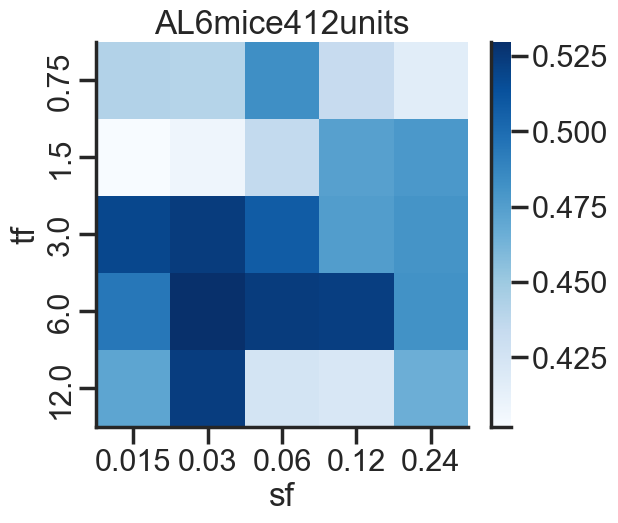

In [80]:
f, ax = plt.subplots(1, 1, sharey=True,figsize = (6,5))
ri='AL'
df_psth_byid['et']=df_psth_byid['id'].transform(lambda x:'_'.join(x.split('_')[:-1]))
tmp = df_psth_byid[(df_psth_byid.region==ri)
                  &(df_psth_byid.times>=0.5)
                  &(df_psth_byid.times<0.7)
          &(df_psth_byid.et.str.contains('|'.join(bnet))) ###for AL,LM pre
                   &(~df_psth_byid.id.str.contains('|'.join(rec_to_exclude)))
          &(df_psth_byid.pre_post=='pre')
                   &(df_psth_byid.exprt=='BPnoise 10t')
                  &(~df_psth_byid.et.str.contains('|'.join(['26']))) # for AL pre
                 ].groupby(['pre_post','et','id','region','sf','tf']).mean()



unitn=len(tmp.groupby(level=2).count())
micen=len(set(tmp.groupby(level=1).count().index.to_series().apply(lambda x:'_'.join(x.split('_')[:-1])).values))
tmp3=tmp.groupby(level=2).apply(lambda x: (x-x.min())/(x.max()-x.min())).reset_index()
tmp3=tmp3.groupby(['pre_post','region','sf','tf'],as_index=False).mean()
hm=tmp3.pivot('tf','sf','zscore') 
sns.heatmap(hm, cmap = heatdic[ri],  
                ax=ax, 
#             vmin=0.4,
#             vmax=0.6,
                annot=False )
    
sns.despine()
ax.legend('',frameon=False)
ax.set_title(ri+str(micen)+'mice'+str(unitn)+'units')
# ax[0].set_ylabel('Z-score')
################ plt.savefig(report_directory + 'V1pre9rec_norm500-700meanzsc.pdf')
################ plt.savefig(report_directory + 'V1pre9rec_norm500-700meanzsc.png')

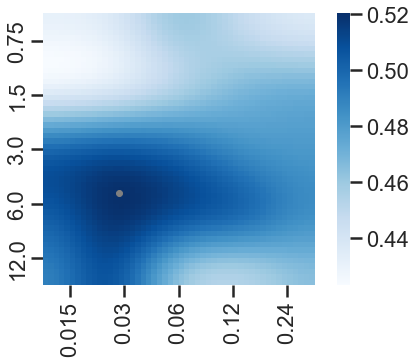

In [71]:
f, ax = plt.subplots(1, 1, sharey=True,figsize = (8,5))
from scipy.ndimage.filters import gaussian_filter
hm_l=scipy.ndimage.zoom(hm, 10, order=1)
hm_smooth = gaussian_filter(hm_l, sigma=5)
#hm_norm=(hm_smooth-hm_smooth.min())/(hm_smooth.max()-hm_smooth.min())
sns.heatmap(hm_smooth, cmap = heatdic[ri],  
#             yticklabels=5,
#             xticklabels=5,
#                 ax=ax, 
            square=True,
                annot=False 
           )
plt.xticks(np.arange(5, 50+1, 10),tmp3.sf.unique())
plt.yticks(np.arange(5, 50+1, 10),tmp3.tf.unique())
plt.plot(np.unravel_index(hm_smooth.argmax(),hm_smooth.shape)[1],np.unravel_index(hm_smooth.argmax(),hm_smooth.shape)[0],
         '.','black')
############ plt.savefig(report_directory + 'V1pre17rec_norm500-700meanzsc_smooth.pdf')
############ plt.savefig(report_directory + 'V1pre17rec_norm500-700meanzsc_smooth.png')
plt.show()

In [72]:
np.unravel_index(hm_smooth.argmax(),hm_smooth.shape)

(33, 14)

In [244]:
# df_psth.head()
regioncolor={'V1':'gray','LM':'red','AL':'blue'}
prepostcolor={'pre':'gray',
              'post':'cyan'}

In [245]:
# cont_untrained_et=df_psth[df_psth.exprt.str.contains('trained')].et.unique()
cont_untrained_et=set(['_'.join(k.split('_')[:-1]) for k,v in conditions.items() if any(['trained' in vv for vv in v])])
cont_untrained_et

{'ET#027_right_pre',
 'ET#028_left_pre',
 'ET#028_right_pre',
 'ET#029_right_pre',
 'ET#030_right_pre',
 'ET#031_left_pre',
 'ET#031_right_post',
 'ET#032_left_pre',
 'ET#051_right_post',
 'ET#052_right_post',
 'ET#054_left_post',
 'ET#054_right_post',
 'ET#055_left_post',
 'ET#055_right_post',
 'ET#056_left_post',
 'ET#056_right_post',
 'ET#057_left_post',
 'ET#057_right_post',
 'ET#058_left_post',
 'ET#058_right_post',
 'ET#059_left_post',
 'ET#059_right_post',
 'ET#060_left_post',
 'ET#060_right_post',
 'ET#061_left_post',
 'ET#061_right_post',
 'ET#063_left_post',
 'ET#063_right_post',
 'ET#064_left_post',
 'ET#064_right_post',
 'ET#065_right_post',
 'ET#066_right_post',
 'ET#067_left_post',
 'ET#067_right_post',
 'ET#068_left_post',
 'ET#069_left_post',
 'ET#069_right_post',
 'ET#070_left_post',
 'ET#070_right_post',
 'ET#071_left_post',
 'ET#071_right_post',
 'ET#072_left_post',
 'ET#072_right_post',
 'ET#075_left_post',
 'ET#075_right_post',
 'ET#076_left_post',
 'ET#076_right_p

In [418]:
AL=6,0.03
LM=0.75,0.12
param_r=LM

In [419]:
def unnesting(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx
    return df1.join(df.drop(explode, 1), how='left')

In [420]:
params=LM
to_plot=df_psth_byid[#(~df_psth_byid.et.isin(rec_to_exclude))
              (~df_psth_byid.exprt.str.contains('Hz'))
                  &(~df_psth_byid.exprt.str.contains('ChR2'))
              &(~df_psth_byid.exprt.str.contains('Arch'))
                &(~df_psth_byid.exprt.str.contains('arch'))
                &(df_psth_byid.tf==params[0])
                   &(df_psth_byid.sf==params[1])
         ].drop(columns=['level_0','index']).reset_index()
to_plot['et']=to_plot.id.transform(lambda x:'_'.join(x.split('_')[:3]).replace('ET','ET#'))
to_plot=to_plot.drop(to_plot[(to_plot.tf==params[0])
                           &(to_plot.sf==params[1])
                           &(to_plot.exprt=='BPnoise 10t')
                           &(to_plot.et.isin(cont_untrained_et))
                                  ].index)
to_plot.head()

,index,zscore,times,Hz,id,exprt,sf,tf,pre_post,region,et
0,3000,-1.110091,0.00,2.265858,ET012_left_pre_LM_1,BPnoise 10t,0.12,0.75,pre,LM,ET#012_left_pre
1,3001,-1.072668,0.01,2.321702,ET012_left_pre_LM_1,BPnoise 10t,0.12,0.75,pre,LM,ET#012_left_pre
2,3002,-0.792190,0.02,2.740238,ET012_left_pre_LM_1,BPnoise 10t,0.12,0.75,pre,LM,ET#012_left_pre
3,3003,-0.512879,0.03,3.157034,ET012_left_pre_LM_1,BPnoise 10t,0.12,0.75,pre,LM,ET#012_left_pre
4,3004,-0.237494,0.04,3.567970,ET012_left_pre_LM_1,BPnoise 10t,0.12,0.75,pre,LM,ET#012_left_pre


In [423]:
to_plot['exc']=to_plot.id.map(responsetype)

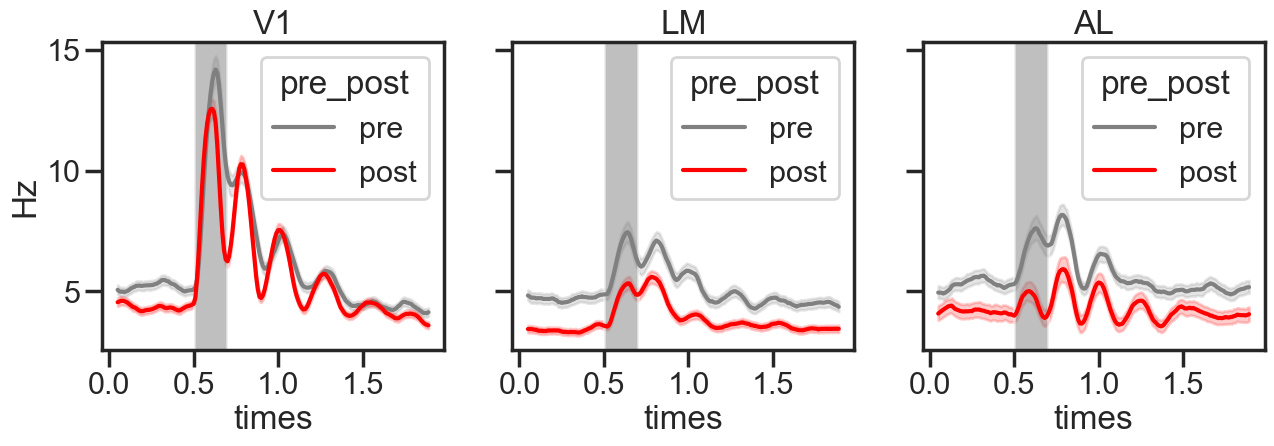

In [427]:
f,ax=plt.subplots(1,3,figsize=(15,4),sharey=True)

for i,rg in enumerate(['V1','LM','AL']):
    sns.lineplot(data=to_plot[(to_plot.region==rg)
    #                           &(to_plot.pre_post=='pre')
    #                           &(to_plot.exc!=0)
                              &(to_plot.times.between(0.05,1.9))
                             ],x='times',y='Hz'
                 ,ci=68
                ,estimator=np.mean
                 ,hue='pre_post'
                 ,ax=ax[i]
                 ,palette={'pre':'gray','post':'red'}
                )
    ax[i].set_title(rg)
    ax[i].axvspan(0.5,0.7,alpha=0.5)
    ax[i].set_xticks(np.arange(0,2,0.5))
# plt.ylim(-0.5,1)
# plt.savefig(report_directory+'psth/LMtrainingV1HVAfiring.png')
# plt.savefig(report_directory+'psth/LMtrainingV1HVAfiring.pdf')

In [347]:
totest = to_plot.groupby(['id','exprt','pre_post','region']).apply(lambda x:[x[x.times.between(0.5,0.7)].Hz.max(),
                                                                    x[x.times.between(0.7,0.9)].Hz.max(),
                                                                    x[x.times.between(0.9,1.2)].Hz.max()           
                                                                   ]).reset_index()

totest['tw1']=totest[0].apply(lambda x:x[0])
totest['tw2']=totest[0].apply(lambda x:x[1])
totest['tw3']=totest[0].apply(lambda x:x[2])
totest=totest.drop(columns=[0])
totest=totest.set_index(['id','exprt','pre_post','region']
                       ).stack().to_frame('amp').reset_index().rename(columns={'level_4':'tw'})
totest.head()



,id,exprt,pre_post,region,tw,amp
0,ET012_left_pre_LM_1,BPnoise 10t,pre,LM,tw1,2.328670
1,ET012_left_pre_LM_1,BPnoise 10t,pre,LM,tw2,2.626692
2,ET012_left_pre_LM_1,BPnoise 10t,pre,LM,tw3,4.048508
3,ET012_left_pre_LM_10,BPnoise 10t,pre,LM,tw1,3.466320
4,ET012_left_pre_LM_10,BPnoise 10t,pre,LM,tw2,4.032196


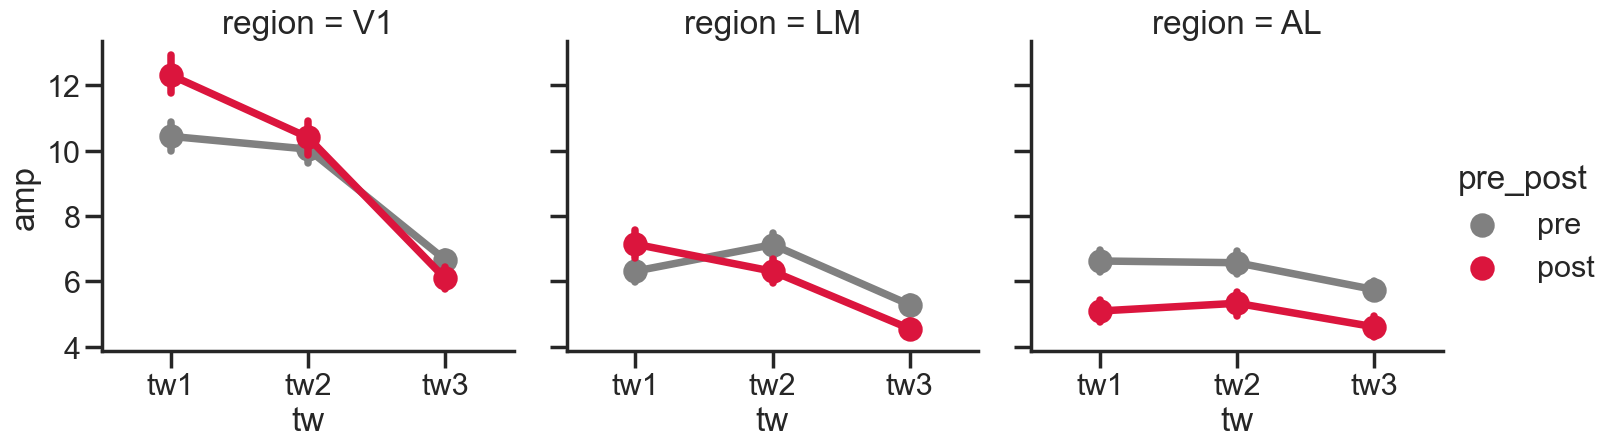

In [428]:
sns.catplot(data=totest
            ,x='tw',y='amp'
            ,kind='point'
            ,ci=68
            ,hue='pre_post'
            ,col='region',col_order=['V1','LM','AL']
#             ,dodge=True
           )
# plt.savefig(report_directory+'psth/LMtrainingV1HVAfiringmax.png')
# plt.savefig(report_directory+'psth/LMtrainingV1HVAfiringmax.pdf')

In [429]:
import pingouin as pg
# totest.groupby(['pre_post','region','tw']).id.nunique()
# totest.groupby(['pre_post','region','tw']).apply(pg.normality)
pg.anova(data=totest,dv='amp',between=['pre_post','region','tw'])

statls=[]
for n,g in totest.groupby(['region','tw']):
    stat=pg.mwu(g[g.pre_post=='post'].amp
                ,g[g.pre_post=='pre'].amp
                  )
    stat['postnunit']=g[g.pre_post=='post'].id.nunique()
    stat['postnmice']=g[g.pre_post=='post'].id.transform(lambda x:''.join(x.split('_')[:2])).nunique()
    stat['prenunit']=g[g.pre_post=='pre'].id.nunique()
    stat['prenmice']=g[g.pre_post=='pre'].id.transform(lambda x:''.join(x.split('_')[:2])).nunique()
    stat['region']=n[0]
    stat['tw']=n[1]
    statls.append(stat)
statdf=pd.concat(statls)
statdf.head()
statdf['pcorr']=pg.multicomp(statdf['p-val'].values)[-1]
# statdf.to_csv(report_directory+'psth/LMtrainingV1HVAfiringmax_stats.csv')
statdf

,U-val,alternative,p-val,RBC,CLES,postnunit,postnmice,prenunit,prenmice,region,tw,pcorr
MWU,181355.5,two-sided,1.124257e-12,0.222434,0.388783,657,9,710,11,AL,tw1,1.011831e-11
MWU,189977.0,two-sided,2.991502e-09,0.185470,0.407265,657,9,710,11,AL,tw2,1.794901e-08
MWU,182596.5,two-sided,3.808233e-12,0.217114,0.391443,657,9,710,11,AL,tw3,3.046587e-11
MWU,252485.5,two-sided,4.042614e-01,0.025431,0.487285,666,9,778,11,LM,tw1,1.000000e+00
MWU,240696.5,two-sided,1.999081e-02,0.070935,0.464532,666,9,778,11,LM,tw2,7.996323e-02
MWU,224772.0,two-sided,1.407990e-05,0.132402,0.433799,666,9,778,11,LM,tw3,7.039951e-05
MWU,427022.0,two-sided,6.471263e-01,-0.012337,0.506169,916,14,921,15,V1,tw1,1.000000e+00
MWU,418047.5,two-sided,7.401504e-01,0.008939,0.495531,916,14,921,15,V1,tw2,1.000000e+00
MWU,353322.5,two-sided,1.684271e-09,0.162382,0.418809,916,14,921,15,V1,tw3,1.178990e-08


In [430]:
# toplot.groupby(['region'])

meta NOT subset; don't know how to subset; dropped


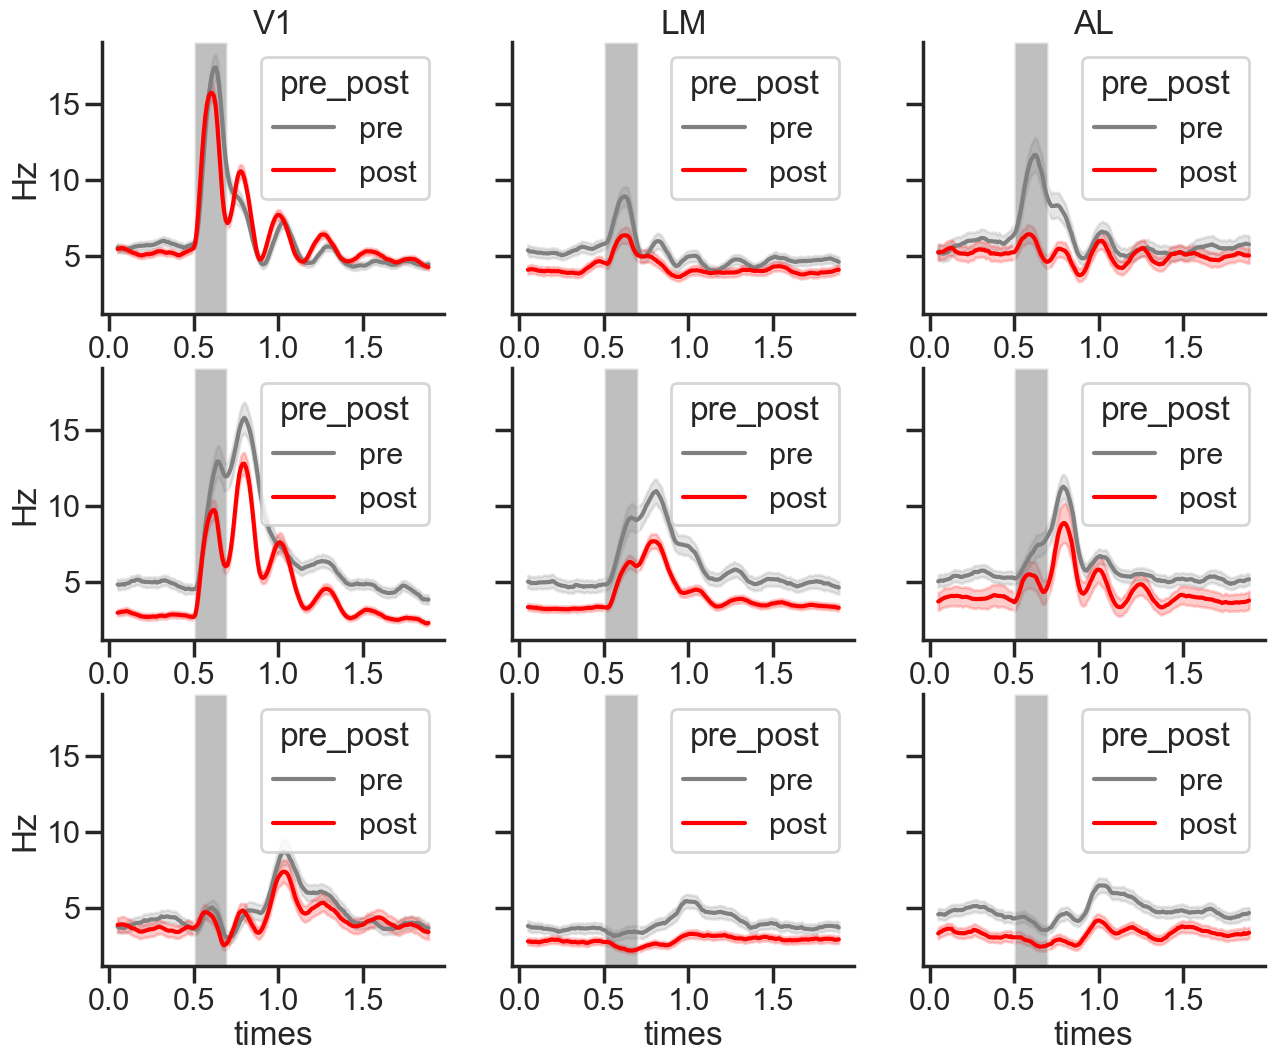

In [432]:
f,ax=plt.subplots(3,3,figsize=(15,12),sharey=True)

for i,ex in enumerate([1,2,3]):
    
    for j,rg in enumerate(['V1','LM','AL']):
        sns.lineplot(data=to_plot[(to_plot.region==rg)
        #                           &(to_plot.pre_post=='pre')
                                  &(to_plot.exc==ex)
                                  &(to_plot.times.between(0.05,1.9))
                                 ],x='times',y='Hz'
                     ,ci=68
                    ,estimator=np.mean
                     ,hue='pre_post'
                     ,ax=ax[i][j]
                     ,palette={'pre':'gray','post':'red'}
                    )
        ax[i][j].axvspan(0.5,0.7,alpha=0.5)
        ax[i][j].set_xticks(np.arange(0,2,0.5))
        ax[0][j].set_title(rg)
#     ax[i].set_title(rg)
#     ax[i].axvspan(0.5,0.7,alpha=0.5)

sns.despine()
# plt.ylim(-0.5,1)
# plt.savefig(report_directory+'psth/LMtrainingV1HVAfiring3sep.png')
# plt.savefig(report_directory+'psth/LMtrainingV1HVAfiring3sep.pdf')

In [355]:
totest = to_plot.groupby(['id','exprt','pre_post','region','exc']).apply(lambda x:[x[x.times.between(0.5,0.7)].Hz.mean(),
                                                                    x[x.times.between(0.7,0.9)].Hz.mean(),
                                                                    x[x.times.between(0.9,1.2)].Hz.mean()           
                                                                   ]).reset_index()

totest['tw1']=totest[0].apply(lambda x:x[0])
totest['tw2']=totest[0].apply(lambda x:x[1])
totest['tw3']=totest[0].apply(lambda x:x[2])
totest=totest.drop(columns=[0])
totest=totest.set_index(['id','exprt','pre_post','region','exc']
                       ).stack().to_frame('amp').reset_index().rename(columns={'level_5':'tw'})
totest.head()



,id,exprt,pre_post,region,exc,tw,amp
0,ET012_left_pre_LM_1,BPnoise 10t,pre,LM,3.0,tw1,1.691194
1,ET012_left_pre_LM_1,BPnoise 10t,pre,LM,3.0,tw2,2.029234
2,ET012_left_pre_LM_1,BPnoise 10t,pre,LM,3.0,tw3,2.535073
3,ET012_left_pre_LM_10,BPnoise 10t,pre,LM,2.0,tw1,2.783737
4,ET012_left_pre_LM_10,BPnoise 10t,pre,LM,2.0,tw2,2.801610


meta NOT subset; don't know how to subset; dropped


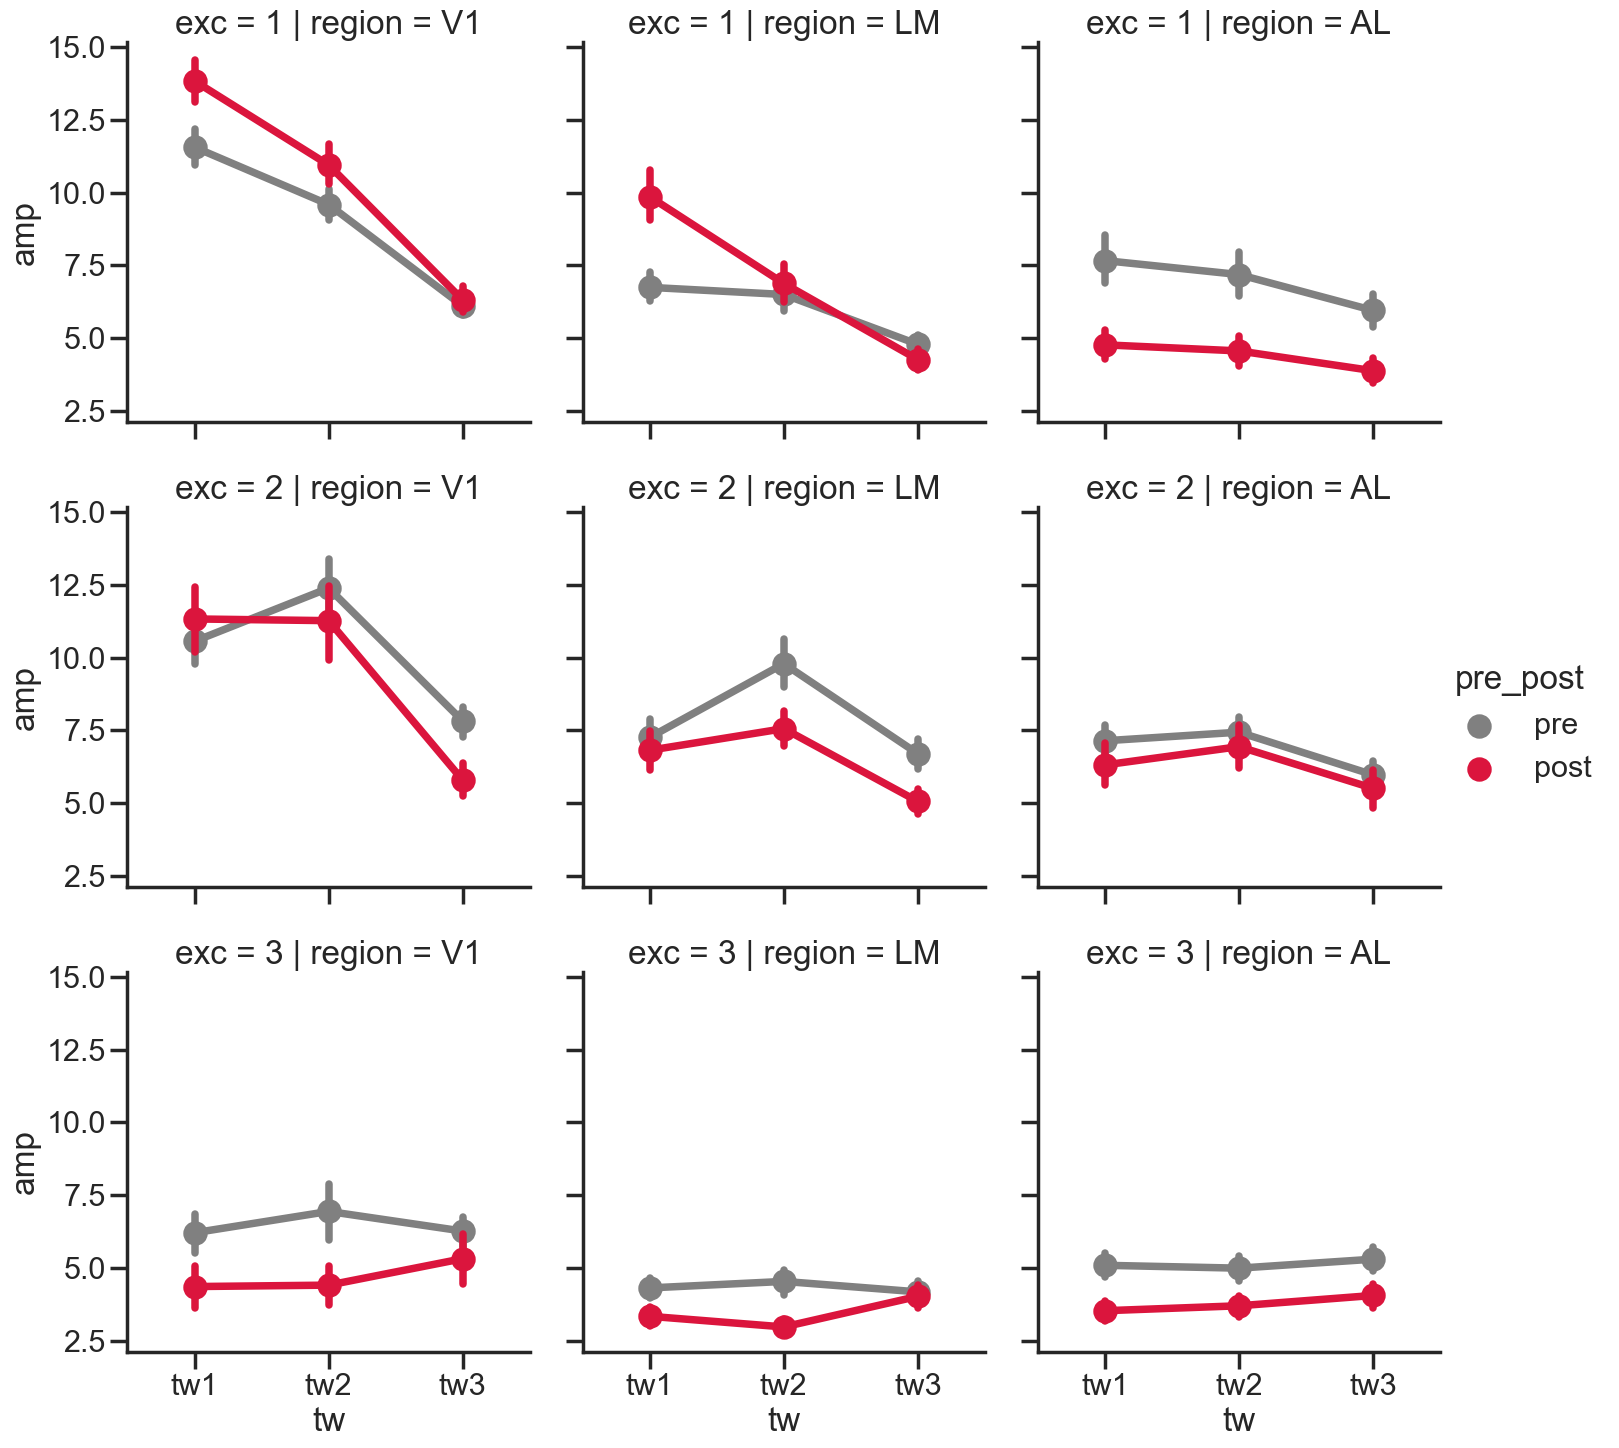

In [356]:
sns.catplot(data=totest[totest.exc!=0]
            ,x='tw',y='amp'
            ,kind='point'
            ,ci=68,estimator=np.mean
            ,hue='pre_post'
            ,col='region',col_order=['V1','LM','AL']
            ,row='exc',row_order=[1,2,3]
#             ,dodge=True
           )
# plt.savefig(report_directory+'psth/ALtrainingV1HVAfiringmean.png')
# plt.savefig(report_directory+'psth/ALtrainingV1HVAfiringmean.pdf')

In [357]:
import pingouin as pg
# totest.groupby(['pre_post','region','tw']).id.nunique()
# totest.groupby(['pre_post','region','tw']).apply(pg.normality)
pg.anova(data=totest,dv='amp',between=['pre_post','region','tw','exc'])

statls=[]
for n,g in totest[totest.exc!=0].groupby(['region','tw','exc']):
    stat=pg.mwu(g[g.pre_post=='post'].amp
                ,g[g.pre_post=='pre'].amp
                  )
    stat['postnunit']=g[g.pre_post=='post'].id.nunique()
    stat['postnmice']=g[g.pre_post=='post'].id.transform(lambda x:''.join(x.split('_')[:2])).nunique()
    stat['prenunit']=g[g.pre_post=='pre'].id.nunique()
    stat['prenmice']=g[g.pre_post=='pre'].id.transform(lambda x:''.join(x.split('_')[:2])).nunique()
    stat['region']=n[0]
    stat['tw']=n[1]
    stat['exc']=n[2]
    statls.append(stat)
statdf=pd.concat(statls)
statdf.head()
statdf['pcorr']=pg.multicomp(statdf['p-val'].values,method='fdr_bh')[-1]
# statdf.to_csv(report_directory+'psth/ALtrainingV1HVAfiringmean3sep_stats.csv')
statdf

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


,U-val,alternative,p-val,RBC,CLES,postnunit,postnmice,prenunit,prenmice,region,tw,exc,pcorr
MWU,16402.0,two-sided,2.856872e-05,0.237577,0.381211,213,9,202,11,AL,tw1,1.0,0.000193
MWU,29456.5,two-sided,5.521038e-06,0.223746,0.388127,273,9,278,11,AL,tw1,2.0,0.000050
MWU,15101.0,two-sided,9.052442e-05,0.228734,0.385633,171,9,229,11,AL,tw1,3.0,0.000407
MWU,16637.0,two-sided,6.548678e-05,0.226654,0.386673,213,9,202,11,AL,tw2,1.0,0.000354
MWU,31004.5,two-sided,2.027957e-04,0.182953,0.408524,273,9,278,11,AL,tw2,2.0,0.000608
MWU,16425.0,two-sided,5.829609e-03,0.161112,0.419444,171,9,229,11,AL,tw2,3.0,0.010945
MWU,15859.0,two-sided,3.671837e-06,0.262818,0.368591,213,9,202,11,AL,tw3,1.0,0.000050
MWU,30894.0,two-sided,1.602905e-04,0.185864,0.407068,273,9,278,11,AL,tw3,2.0,0.000608
MWU,15313.5,two-sided,1.923367e-04,0.217881,0.391060,171,9,229,11,AL,tw3,3.0,0.000608
MWU,40573.5,two-sided,1.856490e-01,-0.065481,0.532740,238,9,320,11,LM,tw1,1.0,0.212193


# unit zscore heatmaps

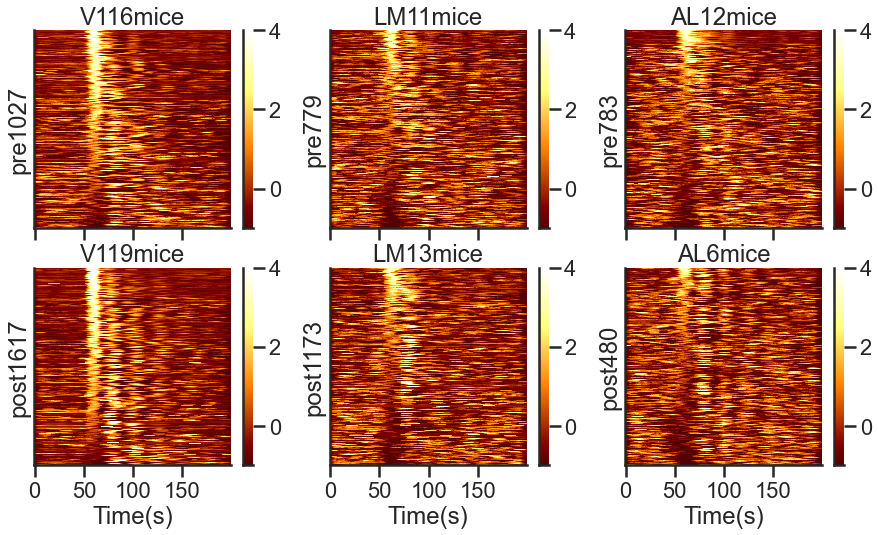

In [82]:
a,b=0.5,0.7


filtered=df_psth_byid
filtered['et']=filtered.id.transform(lambda x:'_'.join(x.split('_')[:-2]).replace('ET','ET#'))

f, ax = plt.subplots(2, 3, sharey=False, sharex=True, figsize = (15,8))
# cbar_ax = f.add_axes([.91, .3, .03, .4])

AL=6,0.03
LM=0.75,0.12
param_r=LM
tmp1=filtered[(filtered.tf==param_r[0])
         &(filtered.sf==param_r[1])
              &(~filtered.exprt.str.contains('Hz'))
              &(~filtered.exprt.str.contains('ChR2'))
              &(~filtered.exprt.str.contains('Arch'))
#          &(filtered.region==ri)
#          &(filtered.pre_post=='post')
#           &(filtered.loco==1)
        ].dropna(subset=['zscore'])#.reset_index()

tmp1=tmp1.drop(tmp1[(tmp1.tf==param_r[0])
                   &(tmp1.sf==param_r[1])
                   &(tmp1.exprt=='BPnoise 10t')
                   &(tmp1.et.isin(cont_untrained_et))
                  ].index
                        )
km=0
for i,pp in enumerate(['pre','post']):
    for ii,ri in enumerate(['V1','LM','AL']):
        tmp2=tmp1[(tmp1.id.str.contains(ri))
                  &(tmp1.id.str.contains(pp))
                 ].groupby(['id','times']).mean().reset_index()
        hm=tmp2.pivot('id', 'times', 'zscore')
#         hm=hm.div(hm.max(axis=1),axis=0)
        if not km:
#             hm = hm.values[np.argsort(np.mean(hm.values[:,50:70],axis=1))[::-1]]
#             hm = hm.sort_values(by=hm.columns[50:150].to_list(),ascending=False)
            sorted1=pd.concat([hm.iloc[:,50:70].mean(axis=1).to_frame('tw1')
                              ,hm.iloc[:,70:90].mean(axis=1).to_frame('tw2')
                              ,hm.iloc[:,90:110].mean(axis=1).to_frame('tw3')]
                             ,axis=1
                             ).sort_values(by=['tw1','tw2','tw3'
                                              ],ascending=False).index.to_list()
#             sorted1=peakzdf[(peakzdf.id.str.contains(ri))
#                            &(peakzdf.id.str.contains(pp))
#                            ].sort_values(by=['zscore'],ascending=False).id.to_list()
#             sorted1=[i for i in sorted1 if i in hm.index]
            hm = hm.reindex(sorted1).values
#             hm = np.delete(hm, np.where(hm.sum(axis=1)==0)[0],axis=0)
        if km:
            hma=hm[hm.index.isin(hm1[hm1.group==0].index.to_list())]
            hma = hma.values[np.argsort(np.mean(hma.values[:,50:100],axis=1))[::-1]]
            hmb=hm[hm.index.isin(hm1[hm1.group==1].index.to_list())]
            hmb = hmb.values[np.argsort(np.mean(hmb.values[:,50:100],axis=1))[::-1]]
            hmc=hm[hm.index.isin(hm1[hm1.group==3].index.to_list())]
            hmc = hmc.values[np.argsort(np.mean(hmc.values[:,50:100],axis=1))[::-1]]
            hmd=hm[hm.index.isin(hm1[hm1.group==2].index.to_list())]
            hmd = hmd.values[np.argsort(np.mean(hmd.values[:,50:100],axis=1))[::-1]]
            hm=np.vstack([hma,hmb,hmc,hmd])
        g=sns.heatmap(hm, cmap = 'afmhot',  annot=False, xticklabels=  50
                      , vmax=4 
                      ,center = 1
                      ,vmin = -1
                      , robust = True, yticklabels=False, ax=ax[i][ii],
                      rasterized=True,
#                     cbar=i == 0,
#                 cbar_ax=None if i else cbar_ax
                   )
        if km:
            ax[i][ii].axhspan(0,hma.shape[0]
                              ,0,0.1,color='gray',alpha=1,lw=0)
            ax[i][ii].axhspan(hma.shape[0],hma.shape[0]+hmb.shape[0]
                              ,0,0.1,color='red',alpha=1,lw=0)
            ax[i][ii].axhspan(hma.shape[0]+hmb.shape[0],hma.shape[0]+hmb.shape[0]+hmc.shape[0]
                              ,0,0.1,color='cyan',alpha=1,lw=0)
            ax[i][ii].axhspan(hma.shape[0]+hmb.shape[0]+hmc.shape[0],hm.shape[0]
                              ,0,0.1,color='blue',alpha=1,lw=0)

        sns.despine()
        ax[i][ii].set_title(ri+str(tmp2.id.transform(lambda x:'_'.join(x.split('_')[:-2])).nunique())+'mice')
        ax[-1][ii].set_xlabel('Time(s)')
#         ax[-1][ii].set_xticklabels(np.arange(0,4,0.5), rotation=30)
#         ax[i][ii].set_ylabel('pre'+str(len(tmp2[tmp2.pre_post=='pre'].id.unique()))
#                              +'post'+str(len(tmp2[tmp2.pre_post=='post'].id.unique())) )

        ax[i][ii].set_ylabel(pp+str(len(tmp2.id.unique()))) 
################# plt.savefig(report_directory + 'psth/post_6_0.03_zschm_nok_11.18.2021.pdf')
################# plt.savefig(report_directory + 'psth/post_6_0.03_zschm_nok_11.18.2021.png')